###1) Curado de datos: Quitar todos los datos sin etiquetar.

In [2]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
f = request.urlopen(example1_url)
dataset1 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(example2_url)
dataset2 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

def curar_datos(dataset):
  return dataset[:,1] != ''

labels_dataset = dataset1[curar_datos(dataset1)]
conc_dataset = dataset2[curar_datos(dataset1)]

x_train_str = conc_dataset[:,1:]
y_train_str = labels_dataset[:,1]

outputs = {
    "healthy": 0,
    "cancer": 1,
    "post-surgery": 2,
    "benign": 3
}

y_train = np.array([])
for cat in y_train_str:
  y_train = np.append(y_train, outputs[cat])

x_train = x_train_str.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


###2) Programar con keras el GD. Indicar el learning rate, el patience del early stopping, el riesgo empírico finalmente alcanzado y el correspondiente accuracy

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=762))
model.summary()

x_train_normalized = np.divide((np.subtract(x_train, x_train.mean(axis=0))), x_train.std(axis=0))

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_train_normalized, y=y_train, batch_size = 390, epochs=1000,callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 3052      
                                                                 
Total params: 3,052
Trainable params: 3,052
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 1s 596ms/step - loss: 1.4920 - accuracy: 0.4051
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1294 - accuracy: 0.5821
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.0634 - accuracy: 0.6385
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0009 - accuracy: 0.6205
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.9647 - accuracy: 0.6487
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9332 - accu

###3) Mostrar la confusion matrix.

13/13 [==============================] - 0s 2ms/step


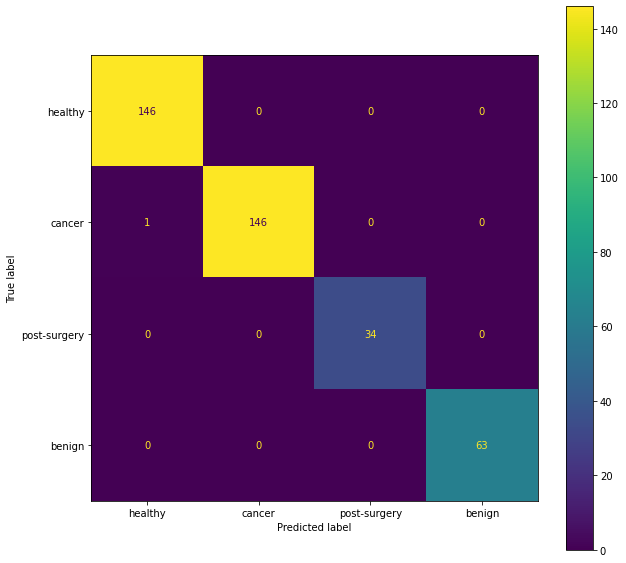

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay

def clasificar_patologia(entrada):
  prediccion = model.predict(entrada)
  arg_max = np.argmax(prediccion, axis=1)
  return arg_max

y_test = clasificar_patologia(x_train_normalized)

# Plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(y_train,y_test,display_labels=outputs.keys(),ax=ax)